In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 1. Cargar el dataset
df = pd.read_csv("empresas_etapa_temprana_final.csv", sep=",")

In [4]:
df["operating_status"].value_counts()["closed"]

119

In [5]:
df["operating_status"].value_counts()["active"]

2396

In [6]:
# 2. Variables categóricas a codificar
categorical_cols = ['last_funding_type', 'category', 'num_employees_enum']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))


In [7]:
# 3. Variables binarias (ya están como 0 y 1)
binary_cols = ['has_linkedin', 'has_facebook', 'has_twitter']

In [8]:
# 4. Variables numéricas
numeric_cols = [
    'equity_funding_total', 'num_articles', 'last_equity_funding_total',
    'num_investments_funding_rounds', 'ipqwery_num_trademark_registered',
    'ipqwery_num_patent_granted', 'num_investors', 'num_lead_investors',
    'funding_total', 'num_funding_rounds', 'last_funding_total',
    'num_founders', 'num_female_founders', 'num_male_founders',
    'twitter_followers', 'company_age', 'distance_to_fifth_year'
]

In [9]:
# 5. Unir todo para el clustering
features = numeric_cols + categorical_cols + binary_cols
X = df[features]

In [10]:
# 6. Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
# ----------------------------------------
# K-MEANS
# ----------------------------------------
# Elegir mejor k (opcional: método del codo)
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

C:\Users\davis\.conda\envs\TF\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(
C:\Users\davis\.conda\envs\TF\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(
C:\Users\davis\.conda\envs\TF\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(
C:\Users\davis\.conda\envs\TF\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have 

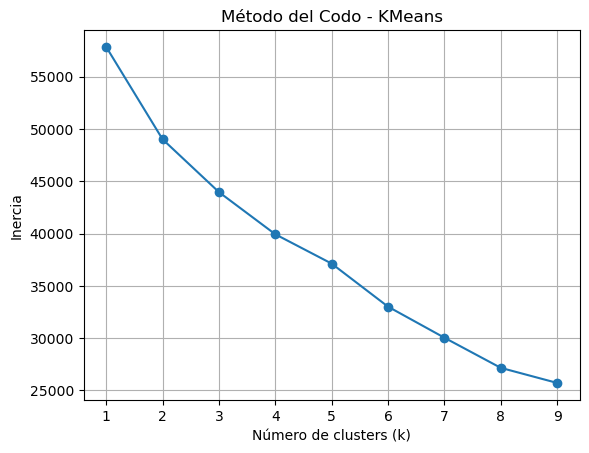

In [40]:
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Método del Codo - KMeans')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

In [28]:
# Elegimos k=3 por ejemplo
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['kmeans_cluster'] = kmeans.fit_predict(X_scaled)

C:\Users\davis\.conda\envs\TF\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


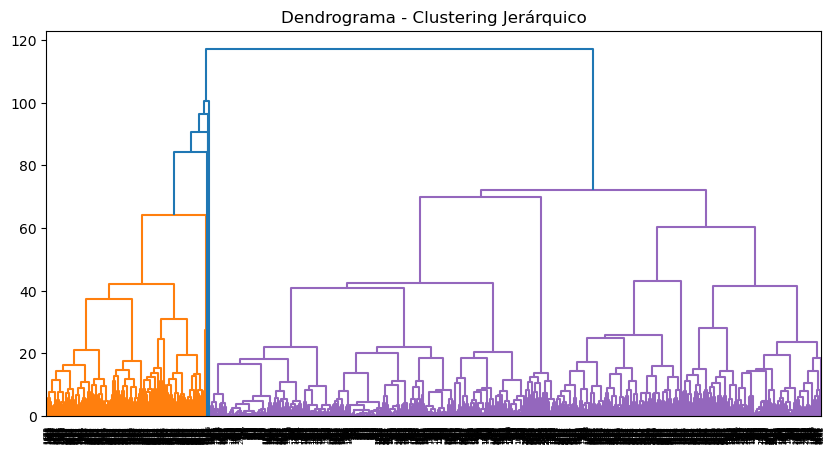

In [29]:
# ----------------------------------------
# CLUSTERING JERÁRQUICO
# ----------------------------------------
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrograma - Clustering Jerárquico")
plt.show()


In [30]:
# Por ejemplo, elegimos 3 clusters
hierarchical = AgglomerativeClustering(n_clusters=3)
df['hierarchical_cluster'] = hierarchical.fit_predict(X_scaled)

In [31]:
# ----------------------------------------
# DBSCAN
# ----------------------------------------
dbscan = DBSCAN(eps=2.5, min_samples=2)
df['dbscan_cluster'] = dbscan.fit_predict(X_scaled)

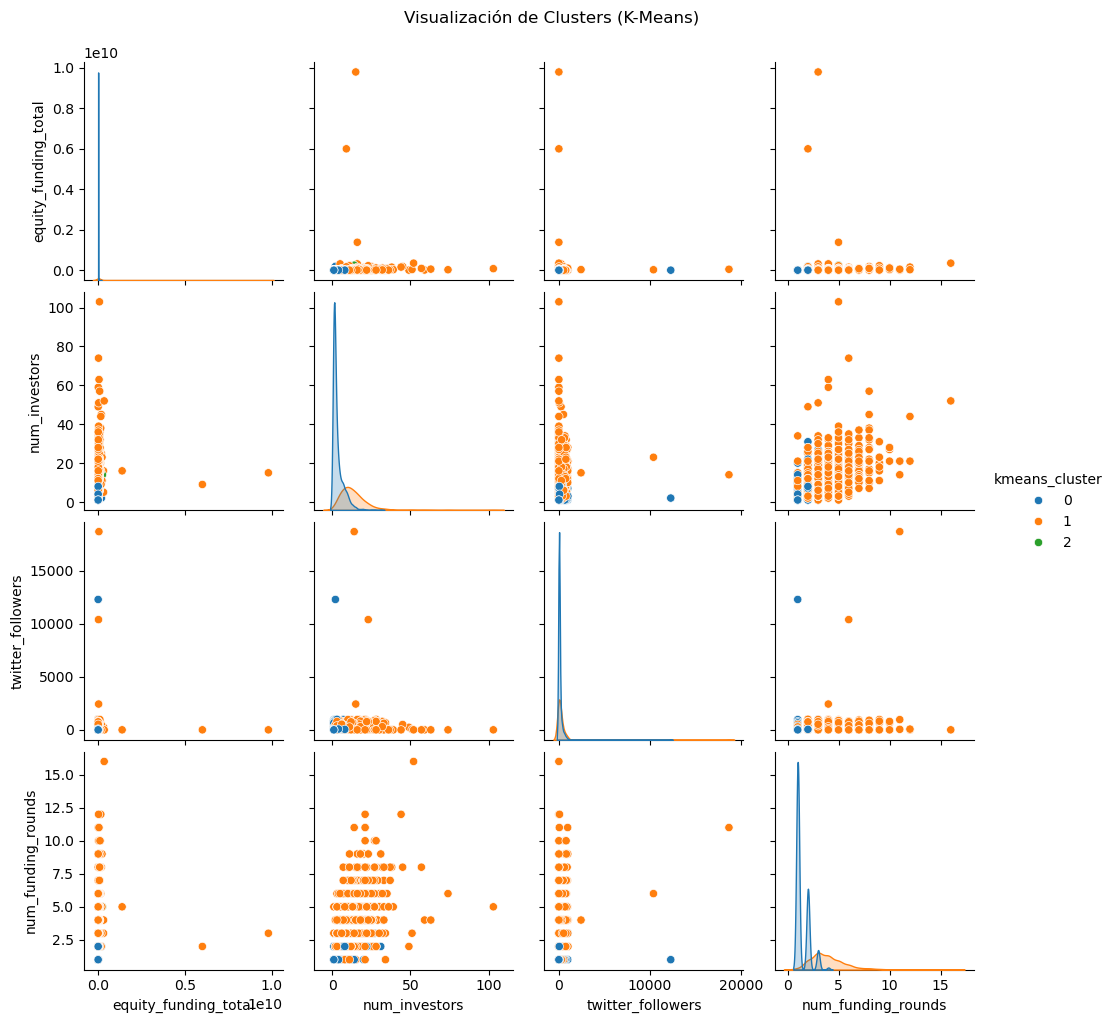

In [32]:
# ----------------------------------------
# VISUALIZACIÓN (KMeans por ejemplo)
# ----------------------------------------
sns.pairplot(df, vars=['equity_funding_total', 'num_investors', 'twitter_followers', 'num_funding_rounds'],
             hue='kmeans_cluster', palette='tab10')
plt.suptitle("Visualización de Clusters (K-Means)", y=1.02)
plt.show()


In [33]:
# ----------------------------------------
# ANÁLISIS FINAL
# ----------------------------------------
# Promedios por cluster (KMeans)
summary = df.groupby('kmeans_cluster')[features].mean().round(2)
print("\nResumen por Clúster (KMeans):\n", summary)

# Exportar a CSV si lo deseas
df.to_csv("startups_clustered.csv", index=False)


Resumen por Clúster (KMeans):
                 equity_funding_total  num_articles  last_equity_funding_total  \
kmeans_cluster                                                                  
0                       1.847670e+06          2.24               3.977168e+06   
1                       4.321516e+07         19.66               5.400124e+07   
2                       2.462939e+08         37.00               2.200000e+12   

                num_investments_funding_rounds  \
kmeans_cluster                                   
0                                         0.00   
1                                         0.02   
2                                         0.00   

                ipqwery_num_trademark_registered  ipqwery_num_patent_granted  \
kmeans_cluster                                                                 
0                                           0.22                        0.09   
1                                           1.18                       